In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import tensorflow as tf


# función útil
def mostrar_kernel(kernel, label=True, digits=None, text_size=28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    # Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val,
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

2023-06-24 22:07:06.810959: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 22:07:07.018332: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-24 22:07:07.020644: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 22:07:08.271263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


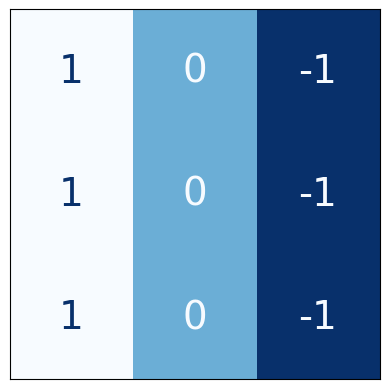

In [2]:
kernel3 = tf.constant(
    [[1, 0, -1],
     [1, 0, -1],
     [1, 0, -1]],
)

mostrar_kernel(kernel3)
# kernel5 = tf.constant(
#     [[1, 1, 0, -1,-1],
#      [1, 1, 0, -1,-1],
#      [1, 1, 0, -1,-1],
#      [1, 1, 0, -1,-1],
#      [1, 1, 0, -1,-1]],
# )
# mostrar_kernel(kernel5)

# Sección 1: Creación de kernels o filtros

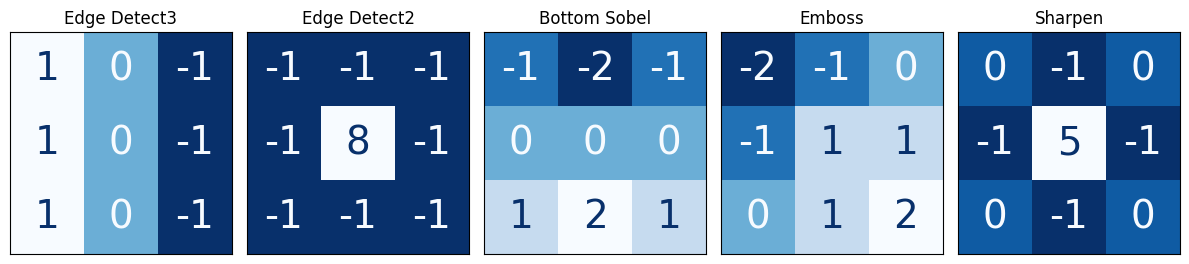

In [3]:
# Edge detection
edge0 = tf.constant(
    [[1, 0, -1],
     [1, 0, -1],
     [1, 0, -1]],
)

edge = tf.constant(
    [[-1, -1, -1],
     [-1, 8, -1],
     [-1, -1, -1]],
)

# Blur
blur = tf.constant(
    [[0.0625, 0.125, 0.0625],
     [0.125, 0.25, 0.125],
     [0.0625, 0.125, 0.0625]],
)

# Bottom sobel
bottom_sobel = tf.constant(
    [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]],
)

# Emboss South-East
emboss = tf.constant(
    [[-2, -1, 0],
     [-1, 1, 1],
     [0, 1, 2]],
)

# Sharpen
sharpen = tf.constant(
    [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]],
)

kernels = [edge0,edge, bottom_sobel, emboss, sharpen]
names = ["Edge Detect3","Edge Detect2", "Bottom Sobel", "Emboss", "Sharpen"]

plt.figure(figsize=(12, 12))
for i, (kernel, name) in enumerate(zip(kernels, names)):
    plt.subplot(1, 5, i+1)
    mostrar_kernel(kernel)
    plt.title(name)
plt.tight_layout()

# Sección 2: Carga de imagen de prueba

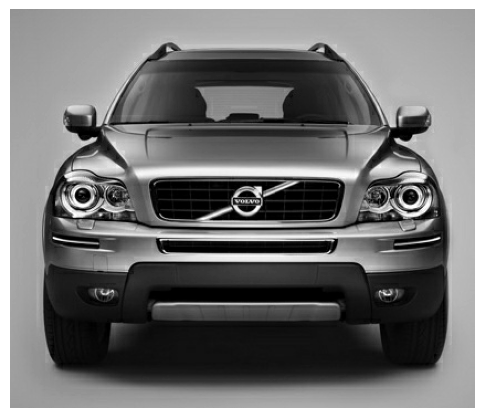

In [4]:
#cargando imagen
image_path = 'car_feature.jpg'
imagen_prueba = tf.io.read_file(image_path)
imagen_prueba = tf.io.decode_jpeg(imagen_prueba)
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(imagen_prueba), cmap='gray')
plt.axis('off')
plt.show()

# Sección 3: Aplicación de convolución

In [5]:
kernel_ejemplo = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])
image = tf.image.convert_image_dtype(imagen_prueba, dtype=tf.float32)

In [17]:
image.shape

TensorShape([361, 421, 1])

In [6]:
image = tf.expand_dims(image, axis=0)

In [32]:
image.shape

TensorShape([1, 361, 421, 1])

In [27]:
kernel_ejemplo.shape

TensorShape([3, 3])

In [7]:
kernel = tf.reshape(kernel_ejemplo, [*kernel_ejemplo.shape, 1, 1])

In [34]:
kernel.shape

TensorShape([3, 3, 1, 1])

In [8]:
kernel = tf.cast(kernel, dtype=tf.float32)
image_filter = tf.nn.conv2d(
      input=image,
      filters=kernel,
      strides=1,
      padding='VALID',
  )

In [38]:
image_filter.shape

TensorShape([1, 359, 419, 1])

In [9]:
imagen_resultado = tf.squeeze(image_filter)

In [40]:
imagen_resultado.shape

TensorShape([359, 419])

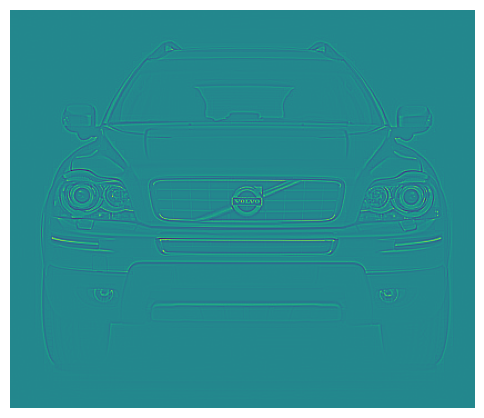

In [10]:
plt.figure(figsize=(6, 6))
plt.imshow(imagen_resultado)
plt.axis('off')
plt.show()

# Pregunta 1: Para que es usado el método expand_dims en las lineas de código previas, muestre las dimensiones de la imagen antes y después de ejecutar la función expand_dims.

Sirve para crear una nueva dimensión con un tamaño de 1 en una posición especificada. Esta dimensión se agrega en el eje de índice indicado por el argumento axis. 

En este caso, se agrega una dimensión en el eje 0 para crear una nueva dimensión correspondiente al tamaño del lote (batch size) de 1.

### Dimensiones (ANTES) : 

TensorShape([361, 421, 1])

### Dimensiones (DESPUÉS) : 

TensorShape([1, 361, 421, 1])

# Pregunta 2: Para que es usado el método reshape en las lineas de código previas, muestre las dimensiones del kernel antes y después de ejecutar la función reshape.

Se utiliza para cambiar la forma de un tensor existente a una nueva forma especificada.

'*' se usa para descomprimir la forma actual de kernel_ejemplo en una lista y luego se agregan dos elementos adicionales al final: 1 y 1. Estos dos elementos adicionales están creando dos nuevas dimensiones en el tensor.

### DIMENSIÓN (ANTES):

TensorShape([3, 3]) 

### DIMENSIÓN (DESPUÉS)

TensorShape([3, 3, 1, 1])

# Pregunta 3: Para que es usado el método squeeze en las lineas de código previas, muestre las dimensiones de la imagen antes y después de ejecutar la función squeeze.

Esta función elimina las dimensiones de tamaño 1 del tensor de entrada. En este caso, se utiliza para eliminar la dimensión de tamaño 1 agregada anteriormente con tf.expand_dims(). Esto se hace para obtener una imagen resultante sin dimensiones de tamaño 1 adicionales.

### DIMENSIONES (ANTES):

TensorShape([1, 359, 419, 1])

### DIMENSIONES (DESPUÉS): 

TensorShape([359, 419])

In [19]:
def ejecutar_convolucion_en_imagen(image,kernel, stride=1, padd='VALID'):
  #organizando los datos en las dimensiones correctas
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  image = tf.expand_dims(image, axis=0)
  kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
  kernel = tf.cast(kernel, dtype=tf.float32)
  #aplicando un convolucion
  image_filter = tf.nn.conv2d(
      input=image,
      filters=kernel,
      strides=stride,
      padding=padd,
  )
  return image_filter

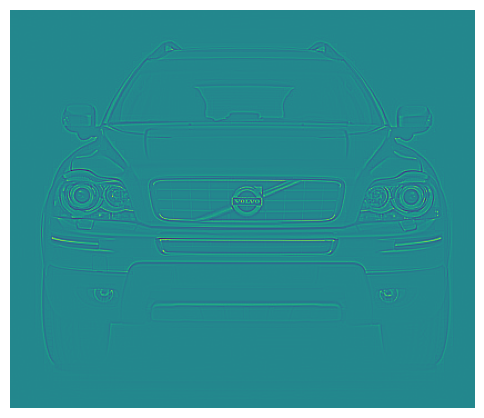

In [43]:
#ejemplo de como usar la función "ejecutar_convolucion_en_imagen"
kernel_ejemplo = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

imagen_resultante = ejecutar_convolucion_en_imagen(imagen_prueba,kernel_ejemplo)
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(imagen_resultante))
plt.axis('off')
plt.show()

# Pregunta 4: Use la función ejecutar_convolucion_en_imagen y aplique los 5 filtros presentados en la "sección 1: Creación de kernels o filtros" a la imagen de prueba y muestre los resultados.

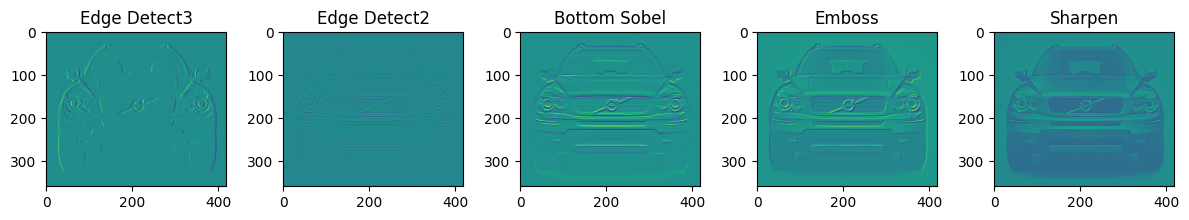

In [44]:
plt.figure(figsize=(12, 12))
for i, (kernel, name) in enumerate(zip(kernels, names)):
    plt.subplot(1, 5, i+1)
    img = ejecutar_convolucion_en_imagen(imagen_prueba, kernel)
    plt.imshow(tf.squeeze(img))
    plt.title(name)
plt.tight_layout()
    

# Pregunta 5: Explique las principales diferencias perceptibles entre los resultados obtenidos en la pregunta previa.

### edge0 (Detección de bordes vertical):

Este filtro resalta los bordes verticales en una imagen, se vuelven más intensos, mientras que los píxeles del resto de la imagen tienden a oscurecerse.Efecto de alto contraste en los bordes verticales.

### edge (Detección de bordes):

Resalta los bordes en una imagen, se vuelven muy prominentes y nítidos. Alto contraste en los bordes horizontales y verticales.

### bottom_sobel (Detección de bordes horizontales):

Este filtro resalta los bordes horizontales en una imagen. Se vuelven más intensos, mientras que los píxeles del resto de la imagen tienden a oscurecerse.

### emboss (Efecto de relieve hacia el sureste):

Este filtro crea un efecto de relieve en la imagen, acentúa los bordes y crea efecto de sombra y reflejo en una dirección sureste.

### sharpen (Realce):

Aumenta la nitidez y el contraste de la imagen, bordes más intensos y los detalles más nítidos. Realce en los bordes y los detalles de la imagen.

# Pregunta 6: Usando la imagen de prueba y el filtro de ejemplo muestre los resultados de la función ejecutar_convolucion_en_imagen variando el parametro strides del método tf.nn.conv2d, pruebe con valores de strides: 5, 3 y 1 e explique las diferencias de los resultados.

Stride define de cuanto en cuantos píxeles recorrerá el kernel, mientras más alto sea, menor será el mapa de características. Se perdería información, aunque podría ser beneficioso si se viera del lado de costo computacional. 

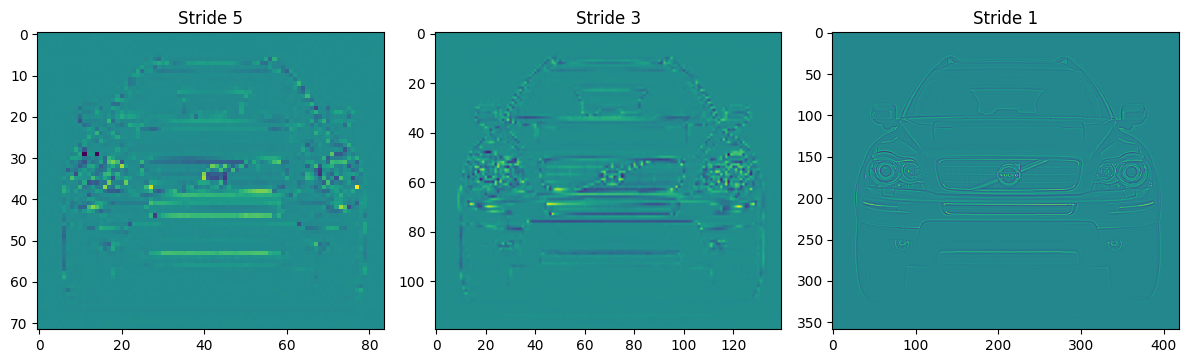

In [51]:
plt.figure(figsize=(12, 12))
for i, stride in enumerate([5, 3, 1]):
    plt.subplot(1, 3, i+1)
    img = ejecutar_convolucion_en_imagen(imagen_prueba, kernel_ejemplo, stride)
    plt.imshow(tf.squeeze(img))
    plt.title(f'Stride {stride}')
plt.tight_layout()

# Pregunta 7: Usando la imagen de prueba y el filtro de ejemplo muestre los resultados de la función ejecutar_convolucion_en_imagen variando el parametro padding del método tf.nn.conv2d, pruebe con valores de padding: 'SAME','VALID' e explique las diferencias de los resultados.

Padding "SAME" agrega relleno para preservar el tamaño de la imagen, mientras que padding "VALID" no agrega relleno y produce una salida más pequeña. 

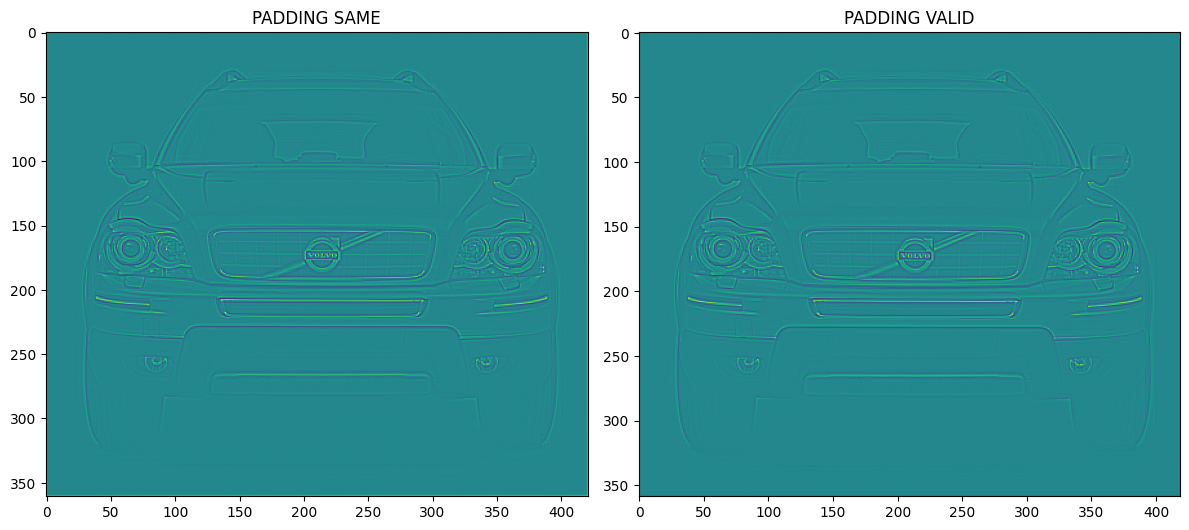

In [20]:
plt.figure(figsize=(12, 12))
for i, pad in enumerate(['SAME', 'VALID']):
    plt.subplot(1, 2, i+1)
    img = ejecutar_convolucion_en_imagen(imagen_prueba, kernel_ejemplo, padd=pad)
    plt.imshow(tf.squeeze(img))
    plt.title(f'PADDING {pad}')
plt.tight_layout()

# Sección 4: Aplicación de ReLu

1. En las siguientes lineas de código aplicaremos la función ReLu a la imagen resultante de la convolución.

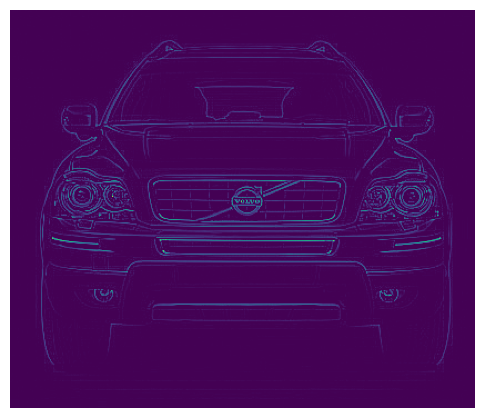

In [22]:
kernel_ejemplo = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])
imagen_resultante_convolucion = ejecutar_convolucion_en_imagen(imagen_prueba,kernel_ejemplo)

#aplicando ReLu
imagen_resultante_relu = tf.nn.relu(imagen_resultante_convolucion)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(imagen_resultante_relu))
plt.axis('off')
plt.show()

# Pregunta 8: Compare el valores almacenados en las imagenes: "imagen_resultante_convolucion" y "imagen_resultante_relu" logra identificar como afecta el uso de la relu en la imagen?

CONVOLUCIÓN representa la salida directa de la convolución, mientras que RELU aplica la función ReLU a la salida de la convolución para obtener una imagen con valores no negativos, conservando los valores >= 0

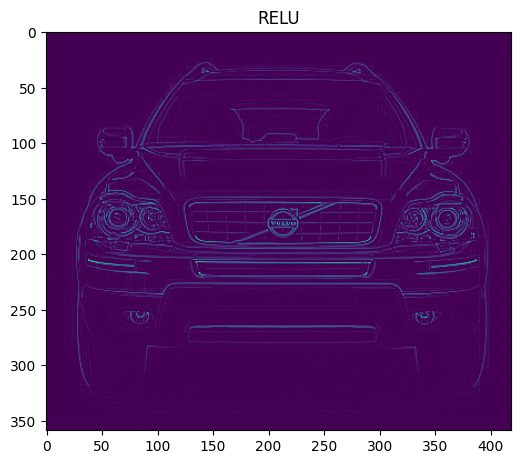

In [23]:
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(imagen_resultante_relu))
plt.title('RELU')
plt.show()

In [25]:
imagen_resultante_relu.shape

TensorShape([1, 359, 419, 1])

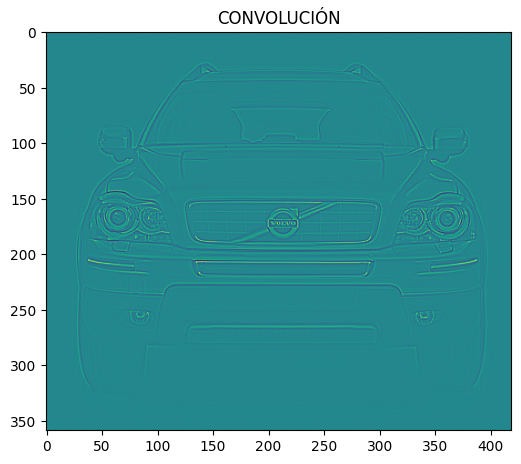

In [24]:
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(imagen_resultante_convolucion))
plt.title('CONVOLUCIÓN')
plt.show()

In [26]:
imagen_resultante_convolucion.shape

TensorShape([1, 359, 419, 1])

# Sección 4: Aplicación de pooling

# Pregunta 9: Compare el valores almacenados en las imagenes: "imagen_resultante_relu" e "imagen_resultante_pooling" logra identificar como afecta el uso del pooling en la imagen?

El uso del pooling tiene el efecto de reducir la resolución espacial de la imagen y resaltar las características más prominentes al tomar los valores máximos en cada ventana de pooling. Esto puede ayudar a reducir la cantidad de información y a extraer características más relevantes.

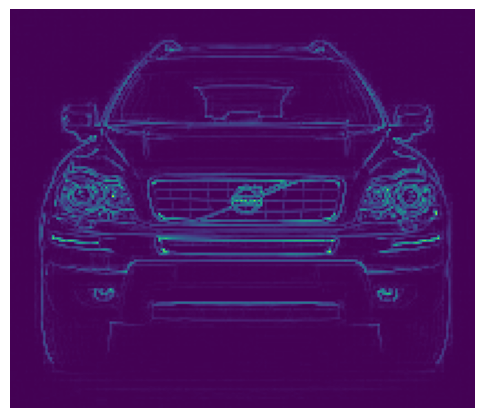

In [28]:
imagen_resultante_pooling = tf.nn.pool(
    input=imagen_resultante_relu,
    window_shape=(2,2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(imagen_resultante_pooling))
plt.axis('off')
plt.show()

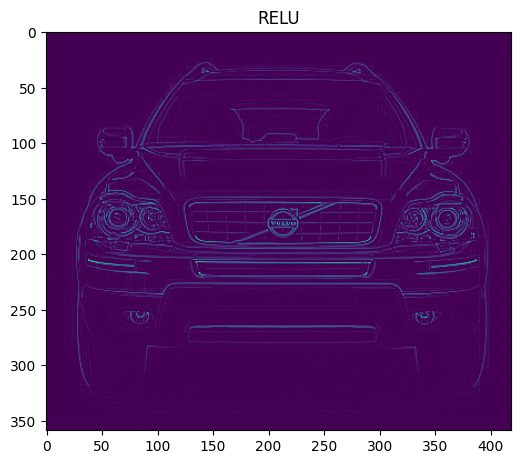

In [29]:
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(imagen_resultante_relu))
plt.title('RELU')
plt.show()

# Pregunta 10: Compare los resultados obtenidos variando el parametro window_shape, pruebe con valores de (2,2), (8,8), (16,16), como estos parametros afectan la apariencia y el tamanio de la imagen_resultante_pooling.

Al aumentar el tamaño de la ventana de pooling, se produce una mayor reducción en la resolución espacial de la imagen_resultante_relu, lo que resulta en una imagen_resultante_pooling más pequeña y suavizada. Las características más pequeñas se atenúan en mayor medida a medida que aumenta el tamaño de la ventana. 

In [36]:
def applyPoolToImg(img_relu, window_shape_=(2,2), _pooling_type='AVG'):
  imagen_resultante_pooling = tf.nn.pool(
    input=img_relu,
    window_shape=window_shape_,
    pooling_type=_pooling_type,
    strides=(2, 2),
    padding='SAME',
  )
  return imagen_resultante_pooling

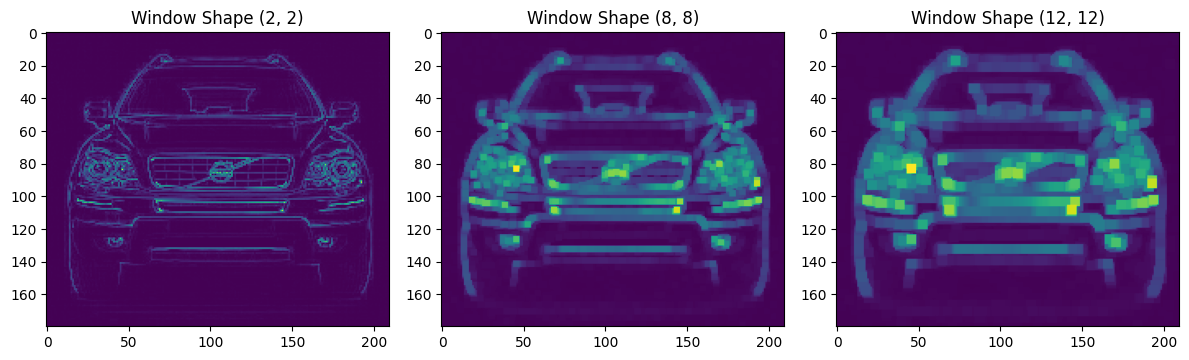

In [31]:
plt.figure(figsize=(12, 12))
for i, wi in enumerate([(2,2), (8,8), (12,12)]):
    plt.subplot(1, 3, i+1)
    img = applyPoolToImg(imagen_resultante_relu, window_shape_=wi)
    plt.imshow(tf.squeeze(img))
    plt.title(f'Window Shape {wi}')
plt.tight_layout()

# Pregunta 11: Compare los resultados obtenidos variando el parametro pooling_type, pruebe con valores 'MAX', 'AVG' como estos parametros afectan la apariencia de la imagen_resultante_pooling.

'MAX' pooling resalta los valores máximos y conserva características prominentes, mientras que el 'AVG' pooling suaviza y promedia los valores, dando una representación más generalizada de las características presentes. 

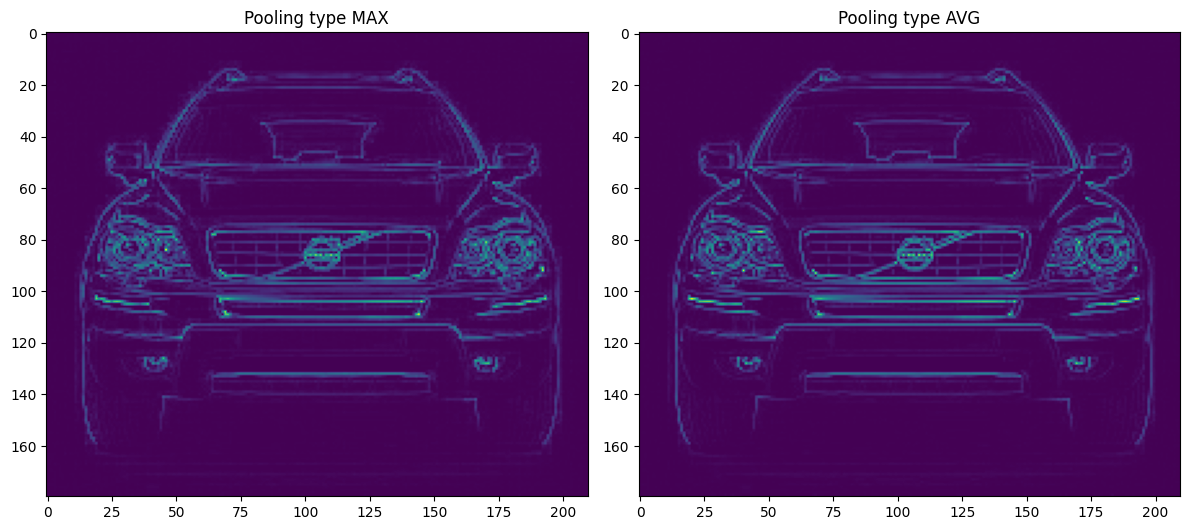

In [40]:
plt.figure(figsize=(12, 12))
for i, ty in enumerate(['MAX', 'AVG']):
    plt.subplot(1, 2, i+1)
    img = applyPoolToImg(imagen_resultante_relu, _pooling_type=ty)
    plt.imshow(tf.squeeze(img))
    plt.title(f'Pooling type {ty}')
plt.tight_layout()

# Sección 5: Primera red convolucional

para completar el laboratorio vamos a usar el conjunto de digitos de mnist para crear una red convolucional simple, incluyendo todos los componentes estudiados

In [41]:
import numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalizizando las imagenes.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Redimensionando las imagenes.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

num_filters = 8
filter_size = 3
pool_size = 2

# Construyendo el modelo.
model1 = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# Configurando el model.
model1.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Pregunta 12: cual es la dimensión de los conjuntos de entrenamiento y test (train_images, test_images)?

((60000, 28, 28, 1), (10000, 28, 28, 1)) respectivamente. 4D

In [43]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Pregunta 13: Cuantas imagenes tiene en conjunto de entrenamiento y el conjunto de test, y de que tamanio son las imagenes?

- 70 000 imágenes 
- 28 x 28 píxeles 

In [44]:
# Entrenando el modelo.
history1=model1.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3


2023-06-24 22:52:15.519985: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 15s 7ms/step - loss: 0.3567 - accuracy: 0.8978 - val_loss: 0.1999 - val_accuracy: 0.9414
Epoch 2/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1712 - accuracy: 0.9504 - val_loss: 0.1346 - val_accuracy: 0.9602
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1228 - accuracy: 0.9643 - val_loss: 0.1068 - val_accuracy: 0.9682


In [46]:
import pandas as pd
#rescatando el historico del entrenamiento
history_frame = pd.DataFrame(history1.history)
history_frame

,loss,accuracy,val_loss,val_accuracy
0,0.356723,0.897850,0.199948,0.9414
1,0.171188,0.950417,0.134558,0.9602
2,0.122820,0.964267,0.106776,0.9682


<Axes: >

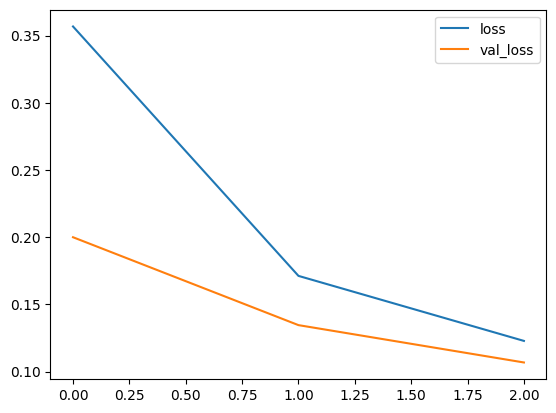

In [47]:
#mostrando el historico de loss de entrenamiento vs validación
history_frame.loc[:, ['loss','val_loss']].plot()

<Axes: >

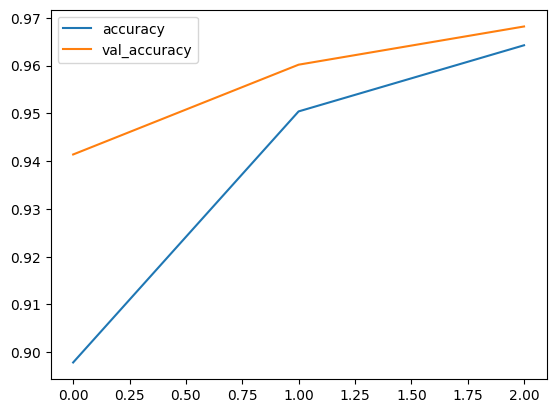

In [48]:
#mostrando el historico de accuracy de entrenamiento vs validación
history_frame.loc[:, ['accuracy','val_accuracy']].plot()

# Pregunta 13: Por qué usamos el método tf.expand_dims antes de hacer la predicción en las siguientes lineas de código?

Agrega una dimensión en el eje 0, lo que resulta en un tensor de forma (1, 28, 28, 1). Esta dimensión adicional representa el tamaño del lote (batch) para la predicción. Ajustar la forma del tensor de entrada al formato requerido por el modelo.

In [49]:
# Predicción usando imagenes de test

# indice de la imagem
indice=0
imagen_test =  tf.expand_dims(test_images[indice], axis=0)
prediction = model1.predict(imagen_test)

# Resultado de prediccion
print("Probabilidades")
print(prediction)

print("Mayor probabilidad")
print(np.argmax(prediction, axis=1))

# Etiqueta real de la imagen
print("Etiqueta real")
print(test_labels[indice])

1/1 [==============================] - 0s 88ms/step
Probabilidades
[[1.1203689e-05 2.9590558e-07 6.1969346e-05 3.9003170e-04 4.3405244e-06
  4.0456530e-07 1.7731354e-10 9.9948573e-01 8.9246146e-07 4.4927725e-05]]
Mayor probabilidad
[7]
Etiqueta real
7


# Pregunta 14: por que no usamos el método tf.expand_dims antes de hacer la prediccines de en la siguiente linea de código?

'test_images' ya tiene la dimensión adecuada para ser utilizado como entrada en el modelo.

In [50]:
predictions_probabilities = model1.predict(test_images)

313/313 [==============================] - 1s 4ms/step


# Pregunta 15: Cuál es la función del método argmax en la siguiente linea de código? 

Se usa para obtener las etiquetas predichas (clases) correspondientes a las probabilidades de predicción generadas por el modelo.

In [51]:
predicted_labels=np.argmax(predictions_probabilities, axis=1)

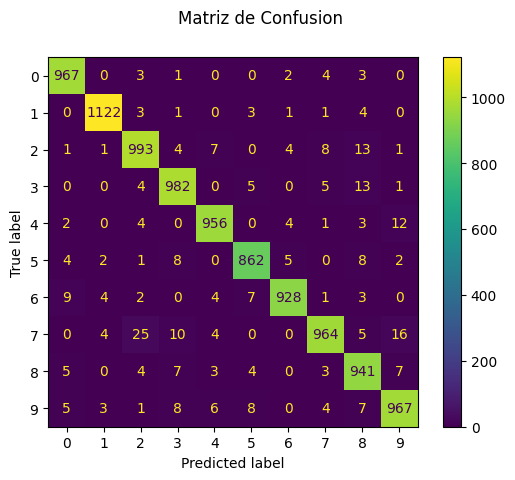

In [54]:
# mostrando matriz de confusion de los resultados de la predicción vs las etiquetas reales o verdaderas
from sklearn import datasets, svm, metrics

disp = metrics.ConfusionMatrixDisplay.from_predictions(test_labels, predicted_labels)
disp.figure_.suptitle("Matriz de Confusion")
plt.show()

# Pregunta 16: Cuál es el efecto de agregar una capa convolucional a la red previamente creada?

El segundo modelo (con la capa adicional) muestra una mejora en la precisión tanto en el conjunto de entrenamiento como en el de validación en comparación con el primer modelo (sin la capa adicional). Esto indica que la adición de una capa adicional ha mejorado el rendimiento del modelo, al menos en términos de precisión del conjunto de test.

In [55]:
num_filters = 8
filter_size = 3
pool_size = 2

# Construyendo el modelo.
model2 = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  Conv2D(num_filters, filter_size),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# Configurando el model.
model2.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Entrenando el modelo.
history2=model2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3


2023-06-24 23:04:39.508466: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.2411 - accuracy: 0.9305 - val_loss: 0.1074 - val_accuracy: 0.9669
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1019 - accuracy: 0.9695 - val_loss: 0.0814 - val_accuracy: 0.9747
Epoch 3/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0779 - accuracy: 0.9766 - val_loss: 0.0829 - val_accuracy: 0.9738


313/313 [==============================] - 1s 3ms/step


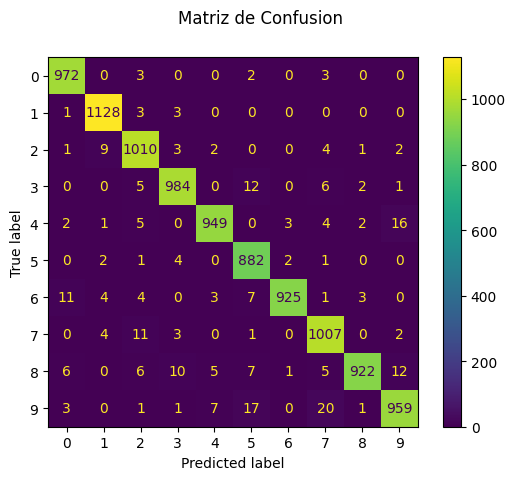

In [56]:
#predicción
predictions_probabilities2 = model2.predict(test_images)
predicted_labels2=np.argmax(predictions_probabilities2, axis=1)
# mostrando matriz de confusion de los resultados de la predicción vs las etiquetas reales o verdaderas
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_labels, predicted_labels2)
disp.figure_.suptitle("Matriz de Confusion")
plt.show()

In [57]:
history_frame2 = pd.DataFrame(history2.history)
history_frame2

,loss,accuracy,val_loss,val_accuracy
0,0.241147,0.930450,0.107434,0.9669
1,0.101938,0.969467,0.081431,0.9747
2,0.077911,0.976583,0.082921,0.9738


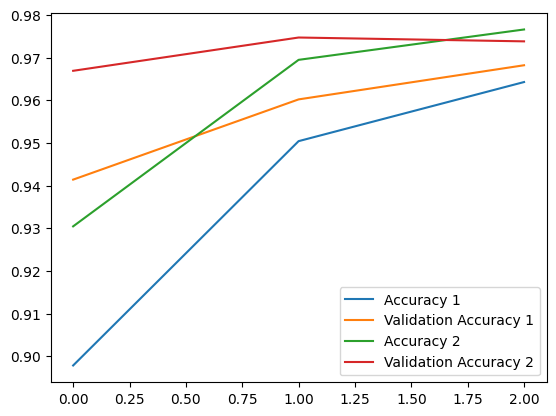

In [61]:
accuracy1 = history_frame['accuracy']
val_accuracy1 = history_frame['val_accuracy']
accuracy2 = history_frame2['accuracy']
val_accuracy2 = history_frame2['val_accuracy']

plt.plot(accuracy1, label='Accuracy 1')
plt.plot(val_accuracy1, label='Validation Accuracy 1')
plt.plot(accuracy2, label='Accuracy 2')
plt.plot(val_accuracy2, label='Validation Accuracy 2')

plt.legend()
plt.show()

In [62]:
print(accuracy1, val_accuracy1, accuracy2, val_accuracy2)

0    0.897850
1    0.950417
2    0.964267
Name: accuracy, dtype: float64 0    0.9414
1    0.9602
2    0.9682
Name: val_accuracy, dtype: float64 0    0.930450
1    0.969467
2    0.976583
Name: accuracy, dtype: float64 0    0.9669
1    0.9747
2    0.9738
Name: val_accuracy, dtype: float64
